<a href="https://colab.research.google.com/github/PranavKamat06/phys152-2026/blob/main/Exercises/Homework-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [81]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

miniboone_data = fetch_openml("miniboone", parser="auto", version=1)
X, y = miniboone_data["data"].values, (miniboone_data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

In [ ]:
# Add code here to explore the dataset
import numpy as np
print(X_train[0][0:3])
print(f"The total size of X is {X.shape[0]}")
print(f"We use {X_train.shape[0]} events for training and {X_test.shape[0]} events for testing X.")
print(f"The total size of y is {y.shape[0]}")
print(f"We use {y_train.shape[0]} events for training and {y_test.shape[0]} events for testing y.")
print(y_test.shape)

[4.09724 1.06346 5.50024]
The total size of X is 130064
We use 104051 events for training and 26013 events for testing X.
The total size of y is 130064
We use 104051 events for training and 26013 events for testing y.
(26013,)


The dataset seems to be a collection of inputs $(X,y)$ where $X_i$ is a collection of 50 data points and $y_i \in \{0,1\}$ is a binary value likely used to indicate whether we have a signal or background measurement. The train test split of our data is 80-20, wherein out of our 130,064 datapoints, we use 104,051 events for training and 26,013 events for testing. There appear to be 50 input features for each point $X_i$ in the training data. A plot of the first three input features for events with $y_{\text{train}}=1$ and a separate plot of the first three input features for events with $y_{\text{train}}=0$ is given below. I wasn't sure whether to plot frequency or value, so I did both to get a deeper understanding of the data. The first two features have pretty similar distributions, with many negative values for $y_{\text{train}}=0$ of order $10^3$, and a few positive values. Most $y_{\text{train}}=1$ values were small and positive. For feature 3, there was still a sprinkling of negative $y_{\text{train}}=0$ values of order $10^3$, but most were positive. Both background and signal events had many small $(10^0\text{ to }10^3)$ values, with signal events also having some larger values for feature 3, in the order of $10^3$ also, but up to $5000$ as opposed to $1000$.

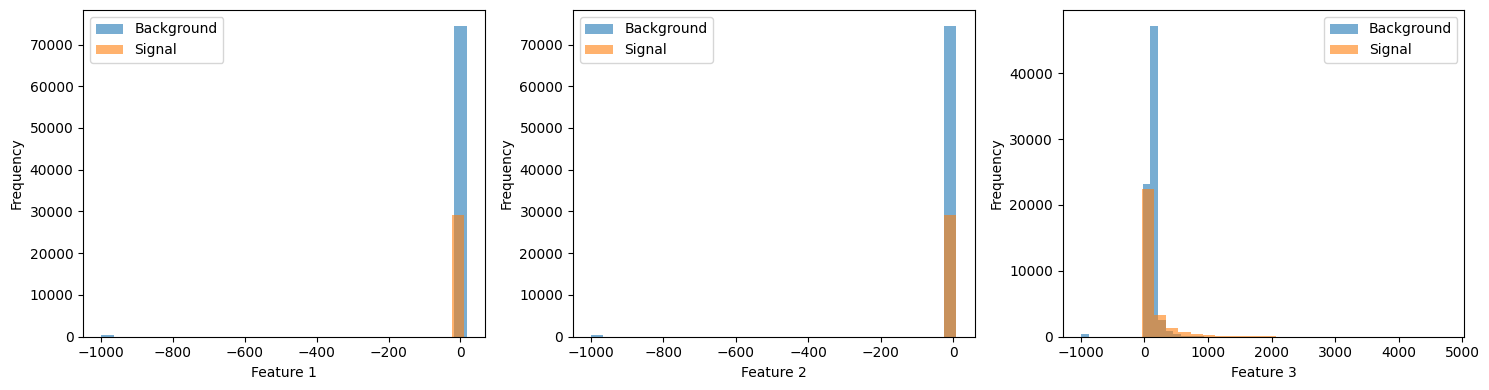

In [ ]:
import matplotlib.pyplot as plt
X_train_one = X_train[y_train==1]
X_train_zero = X_train[y_train==0]
fig, axes = plt.subplots(1,3, figsize = (15, 4))
for i in range(3):
  axes[i].hist(X_train_zero[:,i], alpha =0.6, label = 'Background', bins =30)
  axes[i].hist(X_train_one[:,i], alpha =0.6, label = 'Signal', bins =30)
  axes[i].set_xlabel(f'Feature {i+1}')
  axes[i].set_ylabel('Frequency')
  axes[i].legend()

plt.tight_layout()
plt.show()



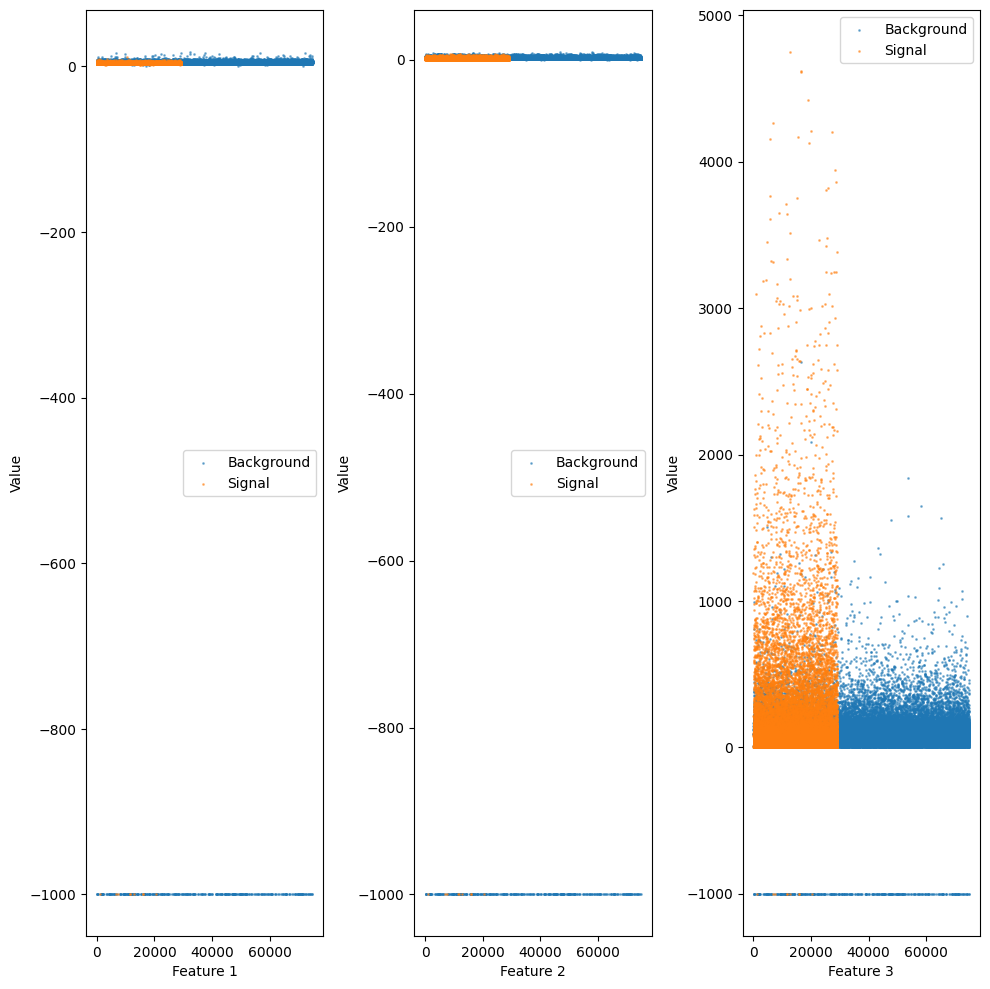

In [ ]:

fig, axes = plt.subplots(1,3, figsize = (10,10))
for i in range(3):
  axes[i].scatter(range(len(X_train_zero)),X_train_zero[:,i], alpha = 0.5,label = 'Background', s = 1)
  axes[i].scatter(range(len(X_train_one)),X_train_one[:,i], alpha = 0.5,label = 'Signal', s = 1)
  axes[i].set_xlabel(f'Feature {i+1}')
  axes[i].set_ylabel('Value')
  axes[i].legend()
plt.tight_layout()
plt.show()

## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


Our confusion matrix is 
[[17567  1091]
 [ 1738  5617]]

 Our AUC score is 0.9381


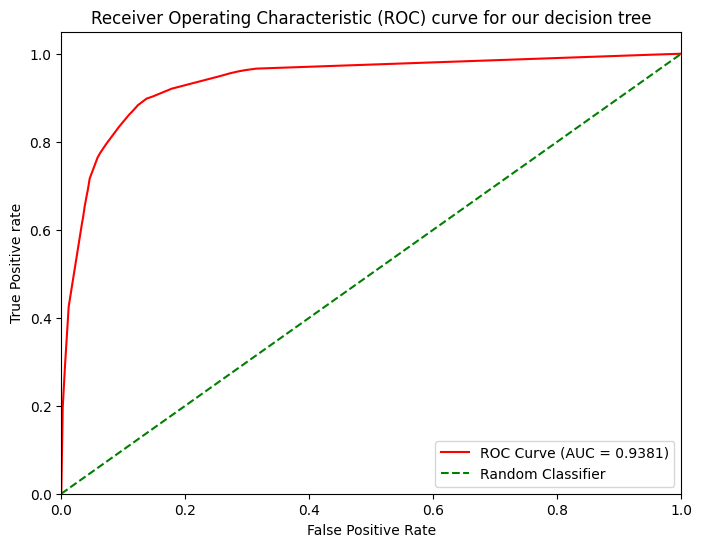

please speed i need this


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
# We train our decision tree model.
score=[]
dtclassifier = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth = 5)
dtclassifier.fit(X_train, y_train)
dtclassifier.score(X_train, y_train),dtclassifier.score(X_test, y_test)


# Then, we evaluate its performance.

y_pred = dtclassifier.predict(X_test)
y_test_proba = dtclassifier.predict_proba(X_test)[:, 1]
if isinstance(y_test, np.ndarray):
    y_test_1d = y_test.ravel()
else:
    y_test_1d = np.array(y_test).ravel()
# Excuse the above mess of code, I kept on getting data type errors and this was the cleanest fix I could find.

cm = confusion_matrix(y_test_1d, y_pred)
print("Our confusion matrix is " + f"\n" + f"{cm}")

fpr, tpr, thresholds = metrics.roc_curve(y_test_1d, y_test_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'red', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1.0], [0, 1.0], color = 'green', linestyle='--',label = "Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve for our decision tree')
plt.legend(loc='lower right')
print(f"\n Our AUC score is {roc_auc:.4f}")
plt.show()
print('please speed i need this')



## part 1(c): Gini impurity measure

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

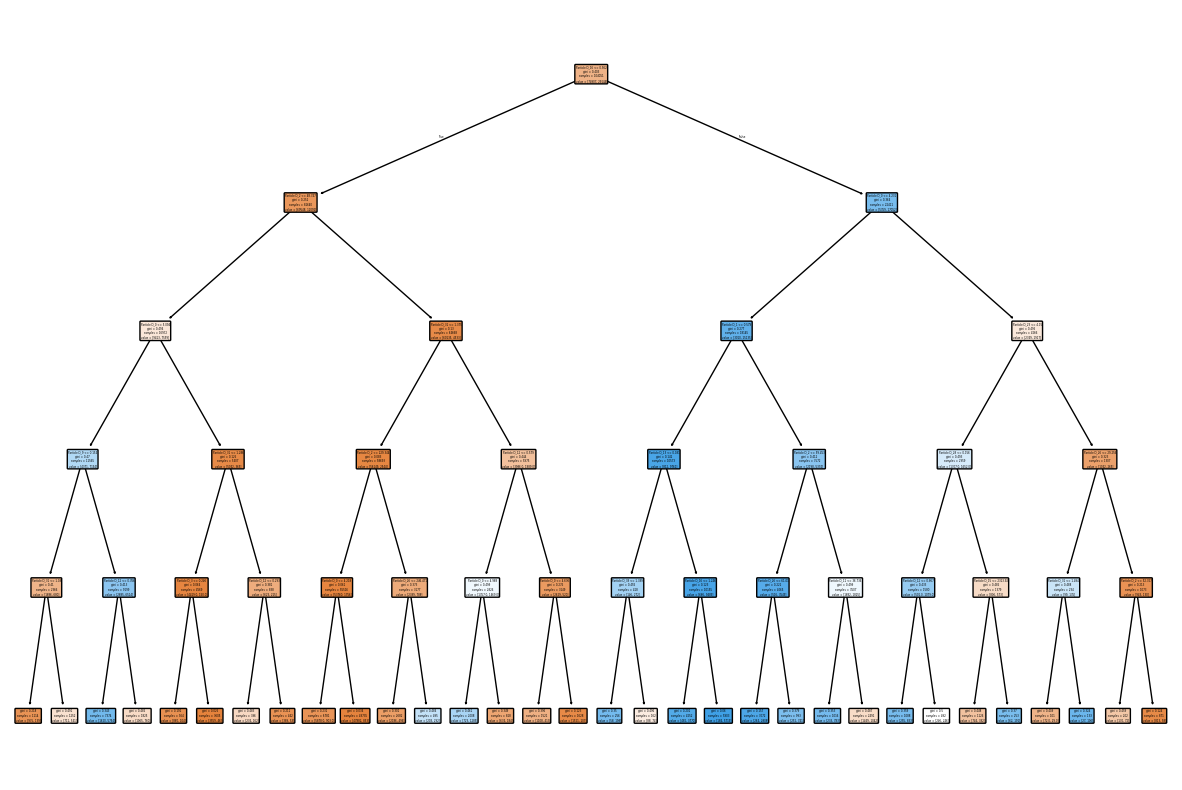

 Leaf node 1:
 Node ID: 5
 Samples in node: 1114
 Class 0 count: 975
 Class 1 count: 139
 Gini from sk-learn: 0.21841327449887027

 Leaf node 2:
 Node ID: 6
 Samples in node: 1252
 Class 0 count: 711
 Class 1 count: 541
 Gini from sk-learn: 0.4907815227265768

 Leaf node 3:
 Node ID: 8
 Samples in node: 7374
 Class 0 count: 1620
 Class 1 count: 5754
 Gini from sk-learn: 0.34285351099447114



In [82]:
# Add code to visualize the decision tree and get impurity measures
# We first visualize the decision tree through a skeleton from lecture 7:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dtclassifier,
          feature_names=miniboone_data['feature_names'],
          filled=True,
          rounded=True)
plt.show()

In [85]:
# Then, we extract the information from the tree and calculate the Gini impurity from the leftmost three leaf nodes.
tree_model = dtclassifier.tree_
# The leaf nodes are given by:
leaf_nodes = np.where(tree_model.feature == -2)[0]
# Then, we sort for the 3 leftmost nodes:
leaf_nodes = np.sort(leaf_nodes)
leftmost_3 = leaf_nodes[:3]
# For which we print all the relevant data, so that we can compute the Gini impurity.
# These empty lists will become important in a bit.
class_0_list = []
class_1_list = []
sk_learn_gini = []
for i, leaf_num in enumerate(leftmost_3,1):
  class_0 = (tree_model.value[leaf_num][0][0] * tree_model.n_node_samples[leaf_num])
  class_1 = (tree_model.value[leaf_num][0][1] * tree_model.n_node_samples[leaf_num])
  print(f" Leaf node {i}:")
  print(f" Node ID: {leaf_num}")
  print(f" Samples in node: {tree_model.n_node_samples[leaf_num]}")
  print(f" Class 0 count: {class_0:.0f}")
  class_0_list.append(class_0)
  print(f" Class 1 count: {class_1:.0f}")
  class_1_list.append(class_1)
  print(f" Gini from sk-learn: {tree_model.impurity[leaf_num]}")
  sk_learn_gini.append(tree_model.impurity[leaf_num])
  print()
# Then, we calculate the Gini impurity manually. We make a table to compare easily.
def gini_manual_func(p_0,p_1):
  return 1 - (p_0 ** 2 + p_1 ** 2)
manual_gini = []
for i in range(3):
  p_0 = class_0_list[i] / tree_model.n_node_samples[leftmost_3[i]]
  p_1 = class_1_list[i] / tree_model.n_node_samples[leftmost_3[i]]
  manual_gini.append(gini_manual_func(p_0,p_1))
# Finally, we have a list of sk-learn gini impurity, sk_learn_gini, and a manually computed list,
# manual_gini. We visualize these in a dataframe to compare.
import pandas as pd
from IPython.core.display import Markdown
panda_data = {'SK-Learn Gini': sk_learn_gini, 'Manual Gini': manual_gini}
df = pd.DataFrame(panda_data)
display(Markdown(df.to_markdown(index=False)))

 Leaf node 1:
 Node ID: 5
 Samples in node: 1114
 Class 0 count: 975
 Class 1 count: 139
 Gini from sk-learn: 0.21841327449887027

 Leaf node 2:
 Node ID: 6
 Samples in node: 1252
 Class 0 count: 711
 Class 1 count: 541
 Gini from sk-learn: 0.4907815227265768

 Leaf node 3:
 Node ID: 8
 Samples in node: 7374
 Class 0 count: 1620
 Class 1 count: 5754
 Gini from sk-learn: 0.34285351099447114



|   SK-Learn Gini |   Manual Gini |
|----------------:|--------------:|
|        0.218413 |      0.218413 |
|        0.490782 |      0.490782 |
|        0.342854 |      0.342854 |

The gini impurity computed by hand is close (if not identical) to the gini impurity computed by SK-Learn, at least for the leftmost three nodes.

# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.



## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

Proof of BP(3):

By definition,
\begin{equation} \delta_j^\ell =\frac{\partial C}{\partial z_j^\ell}.
\end{equation}
Then, by the chain rule,
\begin{equation}\delta_j^\ell = \sum_k \frac{\partial C}{\partial b_k^\ell}\frac{\partial b_k^\ell}{\partial z_j^\ell}.
\end{equation}
But $z_j^\ell=\mathbf{w}^T_j \mathbf{x}+b_j^\ell$, so $b_j^\ell=z_j^\ell-\mathbf{w}^T_j \mathbf{x}$, and hence every term in the sum for which $j\neq{k}$ vanishes. For $j=k$, the second partial derivative in the product evaluates to unity, giving us
\begin{equation} \delta_j^\ell = \frac{\partial C}{\partial b_j^\ell}, \end{equation} as desired.

Proof of BP(4):
By definition,
\begin{equation} \delta_j^\ell =\frac{\partial C}{\partial z_j^\ell}.
\end{equation}
Then, by the chain rule,
\begin{equation}\delta_j^\ell = \sum_k \frac{\partial C}{\partial w_{jk}^\ell} \frac{\partial w_{jk}^\ell}{\partial z_j^\ell}.
\end{equation}
Recall that
\begin{equation}
z_j^\ell = w_{jk}^\ell a_k^{\ell-1},
\end{equation}
and so
\begin{equation}
\frac{1}{a^{\ell-1}} z_j^\ell = w_{jk}^\ell.
\end{equation}
Then,
\begin{equation}
\delta_j^\ell = 0 + \frac{\partial C}{\partial w_{jk}^\ell}\frac{1}{a^{\ell-1}}.
\end{equation}
Equivalently, we have
\begin{equation}
a^{\ell-1}\delta_j^\ell = \frac{\partial C}{\partial w_{jk}^\ell}
\end{equation}
as desired.

## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.




We have
\begin{equation}
\sigma(y)=\text{max}(0,y),\hspace{0.3cm}y=wx+b,
\end{equation}
where $w=0.5,b=0.1$. Our loss function, for our one dimensional input, is
\begin{equation}
L= (y-y_{\text{pred}})^2.
\end{equation}
Equivalently, substituting $y=wx+b$ and $y_{\text{pred}}=1$, we get
\begin{equation}
L = (wx)^2+b^2+2wxb-2wx-2b+1.
\end{equation}
Evaluating partial derivatives, we have
\begin{equation}
\frac{\partial L}{\partial w}= 2(wx^2+bx-x),\hspace{0.3cm} \frac{\partial L}{\partial b}=2(wx+b-1).
\end{equation}
Computing for $x=1,w=0.5,b=0.1$, we have
\begin{equation}
\frac{\partial{L}}{\partial{w}}=-0.2,\hspace{0.3cm}\frac{\partial{L}}{\partial{b}}=-0.2.
\end{equation}


# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [91]:
# Put code here to implement the DNN to classify neutrino events
# You can use the examples from class and the hands-on notebooks
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

miniboone_data = fetch_openml("miniboone", parser="auto", version=1)
X, y = miniboone_data["data"].values, (miniboone_data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = (torch.LongTensor(y_train)).view(-1,1)
X_test = torch.FloatTensor(X_test)
y_test = (torch.LongTensor(y_test)).view(-1,1)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test  = torch.tensor(y_test,  dtype=torch.float32).view(-1, 1)

# create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# create PyTorch DataLoader with batches for training
train_loader = DataLoader(
    train_dataset,
    batch_size=128,      # Adjust based on your needs
    shuffle=True        # Shuffle training data in batches
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False       # Don't shuffle test data
)
# define DNN model
model = nn.Sequential(
    nn.Linear(50, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

# Using BCE loss.
criterion = nn.BCELoss()

# Using Stochastic Gradient Descent as our optimizer, batch size = 128 initialized above.
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Finally, we have our training loop.
for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")



/tmp/ipython-input-129566282.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
/tmp/ipython-input-129566282.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test  = torch.tensor(y_test,  dtype=torch.float32).view(-1, 1)


Epoch 0, Loss: 0.567681074142456
Epoch 10, Loss: 0.5914838314056396
Epoch 20, Loss: 0.542690634727478
Epoch 30, Loss: 0.6664131879806519
Epoch 40, Loss: 0.6079981923103333
Epoch 50, Loss: 0.5659166574478149
Epoch 60, Loss: 0.6255577802658081
Epoch 70, Loss: 0.637069582939148
Epoch 80, Loss: 0.5815732479095459
Epoch 90, Loss: 0.5898579955101013


## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)



Our confusion matrix is 
[[18658     0]
 [ 7355     0]]

Our AUC score is 0.5024



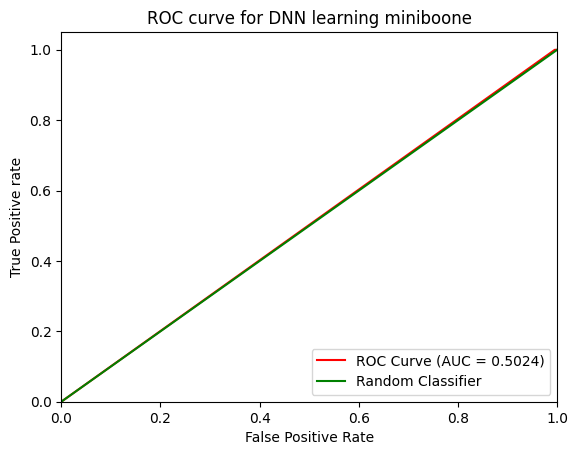

In [96]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
model.eval()
with torch.no_grad():
    y_test_proba = model(X_test).cpu().numpy().ravel()
y_pred = (y_test_proba >=0.5).astype(int)
y_test_1d = y_test.cpu().numpy().ravel()
cm = confusion_matrix(y_test_1d, y_pred)
print("Our confusion matrix is " + f"\n" + f"{cm}")
print(f"\nOur AUC score is {roc_auc:.4f}\n")
fpr, tpr, thresholds = metrics.roc_curve(y_test_1d, y_test_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure.figsize=(8,6)
plt.plot(fpr, tpr, color = 'red', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color = 'green', label=f'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve for DNN learning miniboone')
plt.legend(loc='lower right')
plt.show()

## part 3(c) (10 points): Change of activation function

Replace the sigmoid activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with sigmoid activation functions?

In [97]:
# Put code here to implement the DNN to classify neutrino events
# You can use the examples from class and the hands-on notebooks
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

miniboone_data = fetch_openml("miniboone", parser="auto", version=1)
X, y = miniboone_data["data"].values, (miniboone_data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = (torch.LongTensor(y_train)).view(-1,1)
X_test = torch.FloatTensor(X_test)
y_test = (torch.LongTensor(y_test)).view(-1,1)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test  = torch.tensor(y_test,  dtype=torch.float32).view(-1, 1)

# create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# create PyTorch DataLoader with batches for training
train_loader = DataLoader(
    train_dataset,
    batch_size=128,      # Adjust based on your needs
    shuffle=True        # Shuffle training data in batches
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False       # Don't shuffle test data
)
# define DNN model
model = nn.Sequential(
    nn.Linear(50, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

# Using BCE loss.
criterion = nn.BCELoss()

# Using Stochastic Gradient Descent as our optimizer, batch size = 128 initialized above.
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Finally, we have our training loop.
for epoch in range(100):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

/tmp/ipython-input-1058889737.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
/tmp/ipython-input-1058889737.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test  = torch.tensor(y_test,  dtype=torch.float32).view(-1, 1)


Epoch 0, Loss: 73.91304016113281
Epoch 10, Loss: 71.3043441772461
Epoch 20, Loss: 77.39130401611328
Epoch 30, Loss: 68.6956558227539
Epoch 40, Loss: 77.39130401611328
Epoch 50, Loss: 64.34782409667969
Epoch 60, Loss: 69.56521606445312
Epoch 70, Loss: 66.9565200805664
Epoch 80, Loss: 72.17391204833984
Epoch 90, Loss: 75.65217590332031


Our confusion matrix is 
[[    0 18658]
 [    0  7355]]

Our AUC score is 0.5024



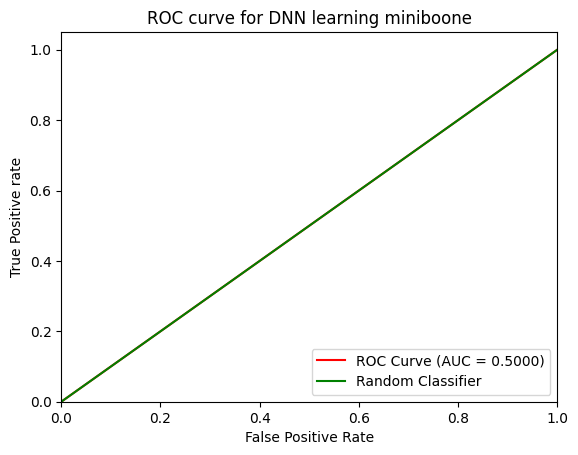

In [98]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
model.eval()
with torch.no_grad():
    y_test_proba = model(X_test).cpu().numpy().ravel()
y_pred = (y_test_proba >=0.5).astype(int)
y_test_1d = y_test.cpu().numpy().ravel()
cm = confusion_matrix(y_test_1d, y_pred)
print("Our confusion matrix is " + f"\n" + f"{cm}")
print(f"\nOur AUC score is {roc_auc:.4f}\n")
fpr, tpr, thresholds = metrics.roc_curve(y_test_1d, y_test_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure.figsize=(8,6)
plt.plot(fpr, tpr, color = 'red', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color = 'green', label=f'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve for DNN learning miniboone')
plt.legend(loc='lower right')
plt.show()

We cannot use the ReLU activation function in the output layer, as we need the sigmoid activation function for binary classifcation. However, we can replace our other activation functions in the hidden layer with ReLU functions, as we have done above. The original algorithm in part 3a yielded an ROC curve identical to the random classifier, and its performance is unfortunately evenly matched by that of the altered algorithm. In fact, the original might be slightly better. The algorithm with ReLU shows an increased loss function value at the end, and the algorithm in 3a has an ROC curve slightly above random classifier at the tail end of the positive rate. In comparison, the ReLU algorithm has a ROC curve that could have been rendered by running plt.plot([0, 1], [0, 1]) again with the color red.